In [1]:
# import sys
# !{sys.executable} -m pip install --upgrade tensorflow 
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import glacierml as gl
import numpy as np
import warnings
from tensorflow.python.util import deprecation
import os
import logging
import seaborn as sns
import janitor
import tabulate
from tqdm import tqdm
from IPython.display import display, HTML
import geopy
# display(HTML("<style>.container { width:85% !important; }</style>"))
tf.get_logger().setLevel(logging.ERROR)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
deprecation._PRINT_DEPRECATION_WARNINGS = False
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)


RS = range(0,25,1)


2022-06-23 13:28:56.596701: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# load datasets, statistics, and predictions
df1 = gl.data_loader()
gl.thickness_renamer(df1)
df2 = gl.data_loader_2()
gl.thickness_renamer(df2)
df3 = df2[[
    'Area',
    'thickness',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Aspect',
    'Lmax'
]]
df4 = gl.data_loader_4()

predictions_df1 = pd.read_csv('zults/predictions_df1.csv')
predictions_df1 = predictions_df1.drop('Unnamed: 0', axis = 1)

deviations_df1 = pd.read_csv('zults/deviations_df1.csv')
deviations_df1 = deviations_df1.drop('Unnamed: 0', axis = 1)

RGI_predicted_df1 = pd.read_csv('zults/RGI_predicted_df1_16-8_0.1_300.csv')
RGI_predicted_df1 = RGI_predicted_df1.drop('Unnamed: 0', axis = 1)


deviations_df2 = pd.read_csv('zults/deviations_df2.csv')
deviations_df2 = deviations_df2.drop('Unnamed: 0', axis = 1)

predictions_df2 = pd.read_csv('zults/predictions_df2.csv')
predictions_df2 = predictions_df2.drop('Unnamed: 0', axis = 1)

deviations_df3 = pd.read_csv('zults/deviations_df3.csv')
deviations_df3 = deviations_df3.drop('Unnamed: 0', axis = 1)
predictions_df3 = pd.read_csv('zults/predictions_df3.csv')

predictions_df3 = predictions_df3.drop('Unnamed: 0', axis = 1)

deviations_df4 = pd.read_csv('zults/deviations_df4.csv')
deviations_df4 = deviations_df4.drop('Unnamed: 0', axis = 1)

predictions_df4 = pd.read_csv('zults/predictions_df4.csv')
predictions_df4 = predictions_df4.drop('Unnamed: 0', axis = 1)

print('tables loaded')

Importing glacier data
matching GlaThiDa and RGI data method 1...
matching GlaThiDa and RGI data method 2...
tables loaded


# df1 = Original GlaThiDa data

In [3]:
deviations_df1

,layer architecture,model parameters,learning rate,validation split,epochs,test mae avg,train mae avg,test mae std dev,train mae std dev,test predicted thickness std dev,train predicted thickness std dev
0,16-8,234.0,0.100,0.2,300,41.105810,11.706625,23.984715,1.113532,27.956337,3.028846
1,12-6,154.0,0.100,0.2,300,44.194938,11.573877,29.858813,1.036621,33.359642,2.830047
2,4-2,42.0,0.001,0.2,300,53.344716,34.602911,16.266679,10.641688,36.437325,12.555993
3,4-2,42.0,0.010,0.2,300,60.937786,19.877422,14.390341,10.942215,39.135151,14.074289
4,10-5,120.0,0.100,0.2,300,67.085236,12.622161,36.821805,1.979221,40.094296,3.081219
5,4-2,42.0,0.100,0.2,300,75.417380,14.643584,36.904610,2.229672,41.293972,2.754097
6,10-5,120.0,0.010,0.2,300,77.033434,13.336754,14.261859,0.918303,15.069434,1.525866
7,12-6,154.0,0.010,0.2,300,83.695605,12.996445,15.475702,0.794160,15.975325,1.204198
8,16-8,234.0,0.001,0.2,300,84.637105,15.905626,11.257258,0.423778,11.267155,0.758871
9,10-5,120.0,0.001,0.2,300,86.768958,17.220403,12.245031,1.127034,13.515974,2.069415


# df2 = RGI matched with GlaThiDa thicknesses (#1)

In [4]:
deviations_df2

,layer architecture,model parameters,learning rate,validation split,epochs,test mae avg,train mae avg,test mae std dev,train mae std dev,test predicted thickness std dev,train predicted thickness std dev
0,10-5,180.0,0.001,0.2,300,13.770663,15.991213,0.459921,0.207674,0.674080,0.497751
1,16-8,324.0,0.010,0.2,300,13.899048,12.547079,0.553865,0.410646,0.924934,1.069993
2,10-5,180.0,0.010,0.2,300,13.906688,13.337456,0.633478,0.557165,1.443864,0.792753
3,16-8,324.0,0.001,0.2,300,13.959261,15.553976,0.330003,0.205292,0.785312,0.497237
4,12-6,224.0,0.010,0.2,300,14.071364,13.139001,0.719480,0.791747,1.512411,0.824287
5,12-6,224.0,0.100,0.2,300,14.663037,11.962417,1.106144,1.055333,2.979971,3.234119
6,16-8,324.0,0.100,0.2,300,14.876523,11.290987,1.043279,1.322897,3.327394,3.697135
7,12-6,224.0,0.001,0.2,300,15.001239,17.167752,6.011046,6.665911,8.790757,9.071623
8,10-5,180.0,0.100,0.2,300,15.038917,13.555154,1.155265,2.083507,3.197400,3.736499
9,4-2,72.0,0.100,0.2,300,15.240183,16.916522,1.109888,3.654496,1.536353,2.758862


# df3 = df2 without lat, lon

In [5]:
deviations_df3

,layer architecture,model parameters,learning rate,validation split,epochs,test mae avg,train mae avg,test mae std dev,train mae std dev,test predicted thickness std dev,train predicted thickness std dev
0,12-6,196.0,0.001,0.2,300,15.365739,17.156493,0.470335,0.261664,0.546457,0.488180
1,10-5,156.0,0.001,0.2,300,15.380121,17.248848,0.310853,0.185944,0.566347,0.523718
2,16-8,288.0,0.001,0.2,300,15.469343,16.808771,0.348812,0.285695,0.409784,0.325154
3,16-8,288.0,0.010,0.2,300,15.812071,15.808586,0.621219,0.560699,1.286803,0.859697
4,4-2,60.0,0.100,0.2,300,15.952915,17.976562,0.791642,2.409015,1.509224,2.028470
5,12-6,196.0,0.010,0.2,300,16.111467,15.724683,0.650830,0.612122,1.271845,0.838197
6,10-5,156.0,0.010,0.2,300,16.533861,16.902246,2.321909,3.298016,5.166796,5.823915
7,12-6,196.0,0.100,0.2,300,16.771674,15.542503,1.171222,0.939086,3.411384,3.636548
8,10-5,156.0,0.100,0.2,300,16.779667,16.367342,0.961192,2.039365,2.794014,3.211891
9,16-8,288.0,0.100,0.2,300,17.178179,14.547218,0.850701,0.992738,3.005646,3.380806


# df4 = RGI matched with GlaThiDa thicknesses (#2)

In [6]:
deviations_df4

,layer architecture,model parameters,learning rate,validation split,epochs,test mae avg,train mae avg,test mae std dev,train mae std dev,test predicted thickness std dev,train predicted thickness std dev
0,16-8,324.0,0.001,0.2,300,44.895165,39.115738,0.666664,0.437850,1.253919,0.683559
1,12-6,224.0,0.001,0.2,300,45.268318,39.497899,1.028777,0.454544,1.455378,0.508797
2,10-5,180.0,0.001,0.2,300,45.754522,40.016116,0.953805,0.443411,1.929131,0.665358
3,12-6,224.0,0.010,0.2,300,48.594358,35.495228,2.514604,1.376348,4.523004,1.927524
4,16-8,324.0,0.010,0.2,300,48.603961,34.793242,2.617963,1.376811,3.587250,1.680440
5,10-5,180.0,0.010,0.2,300,49.005217,36.560189,3.012612,1.220658,4.705969,1.567079
6,12-6,224.0,0.100,0.2,300,52.099151,32.542121,5.732268,2.305025,7.956316,4.313529
7,10-5,180.0,0.100,0.2,300,52.260530,33.822002,6.621112,1.548364,10.351453,5.799570
8,16-8,324.0,0.100,0.2,300,54.863254,31.043324,9.103140,2.085717,10.866838,4.309972


loading and evaluating models...


  0%|          | 0/75 [00:00<?, ?it/s]2022-06-23 13:29:00.404762: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-06-23 13:29:00.404783: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-06-23 13:29:00.405042: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate 

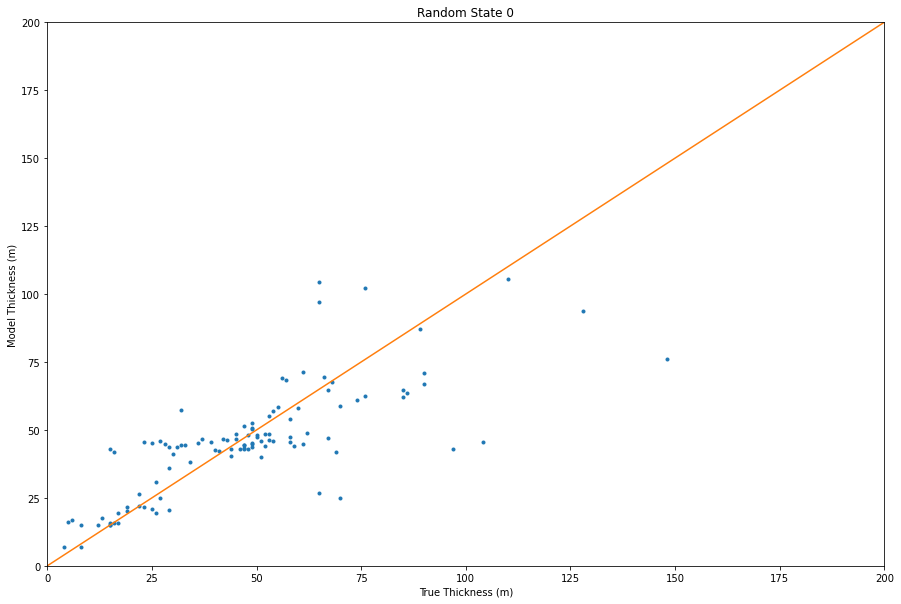

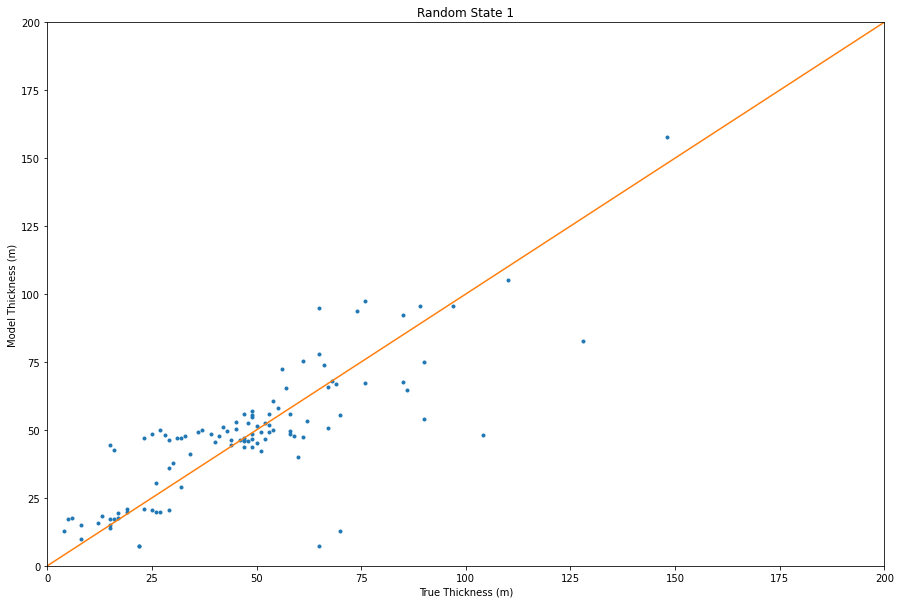

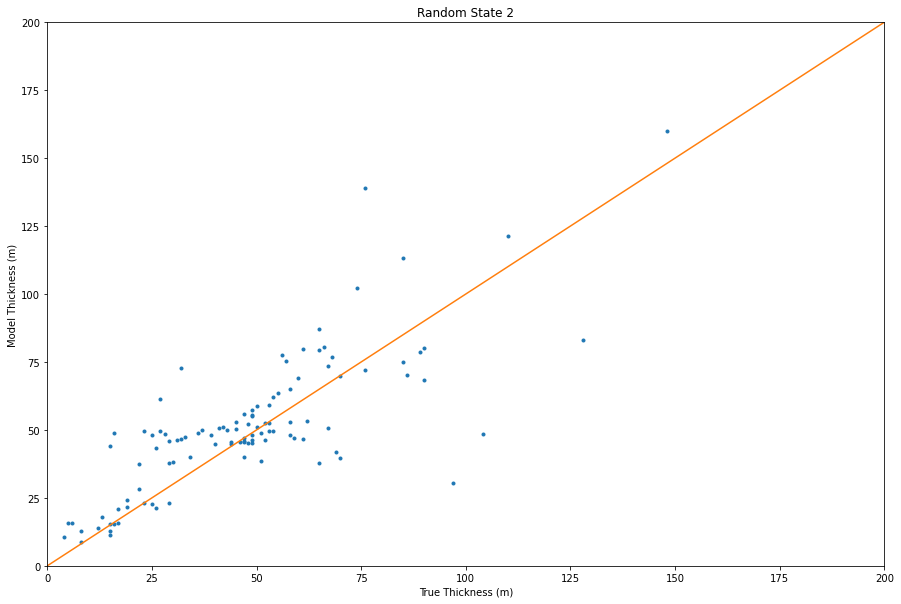

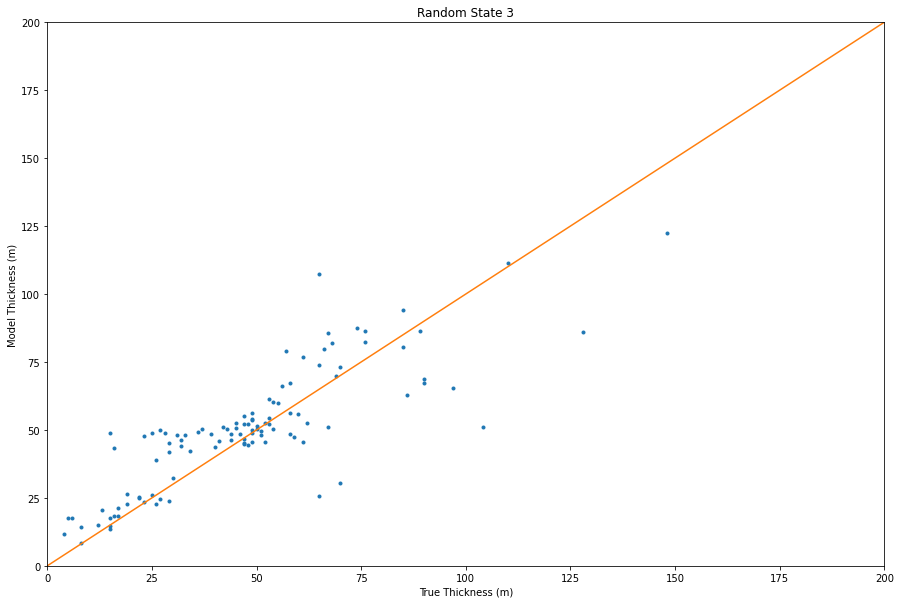

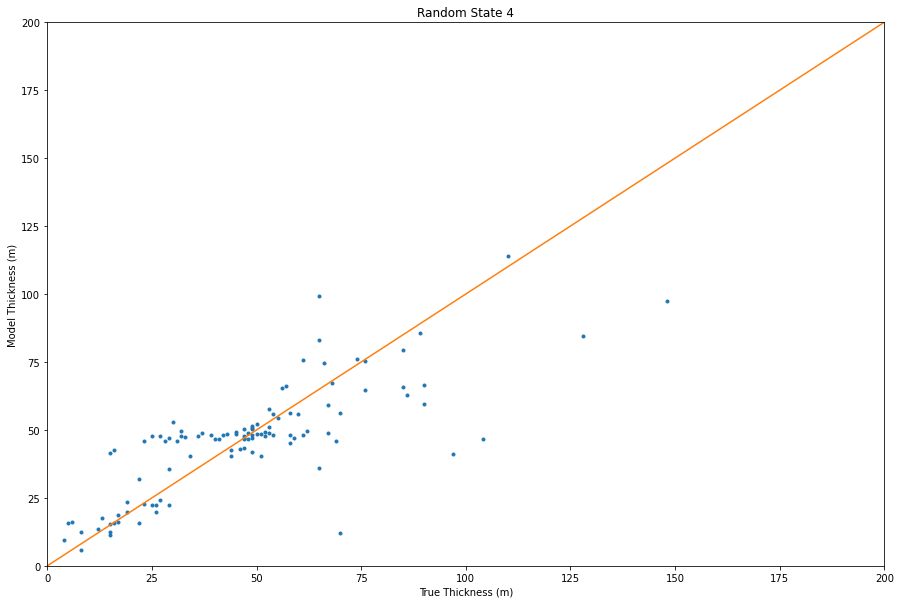

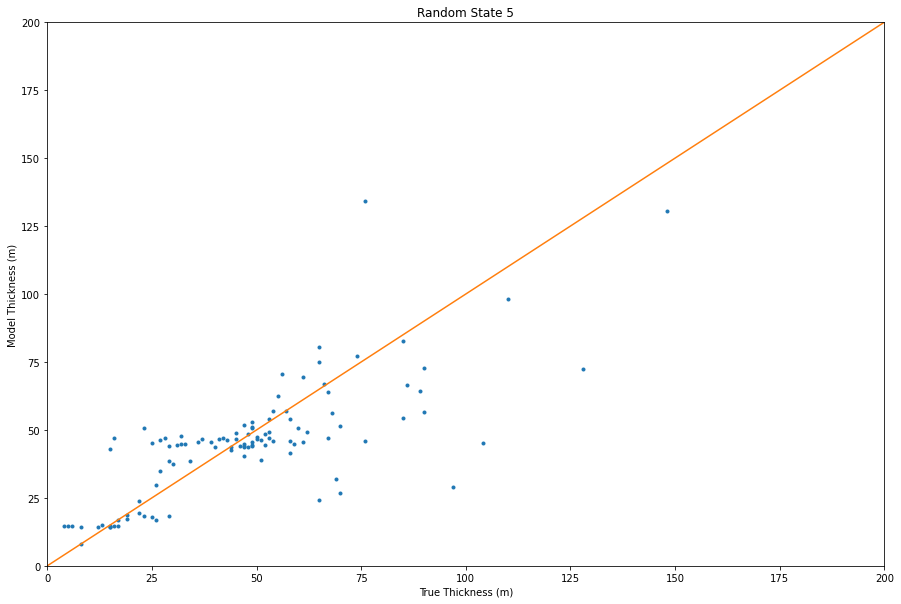

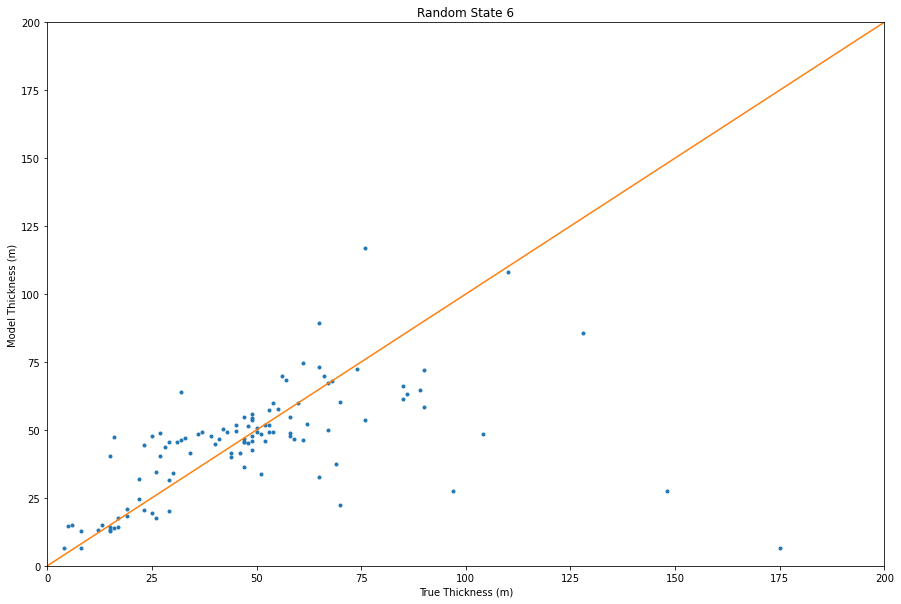

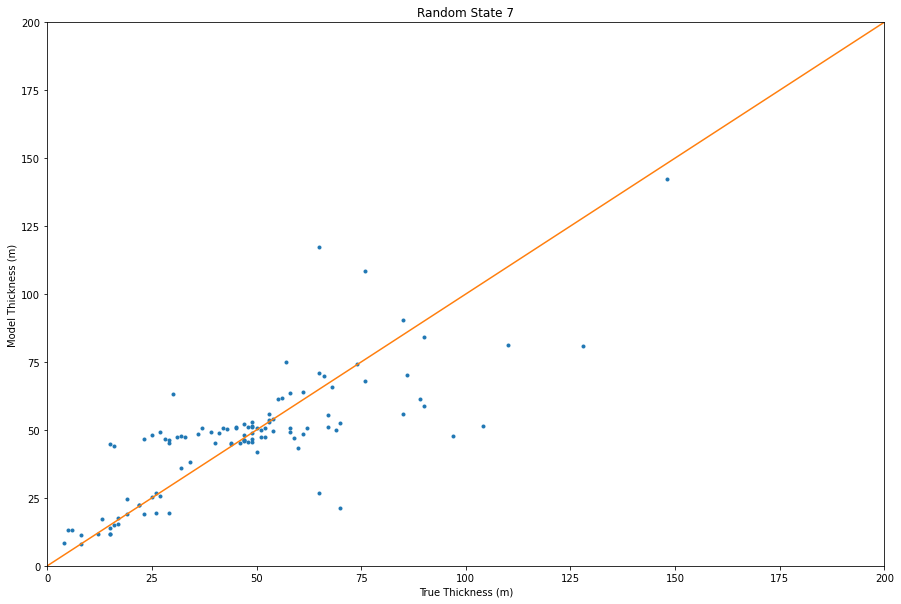

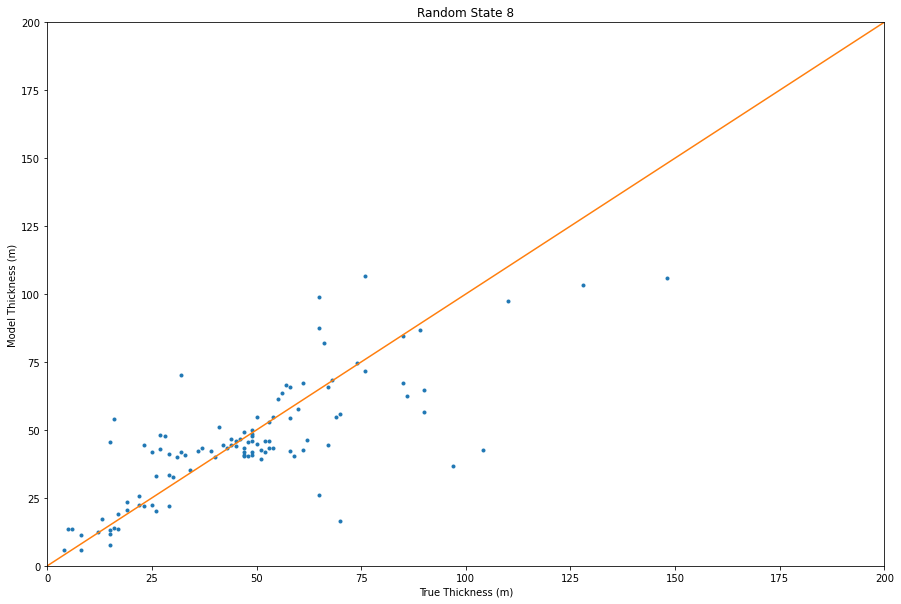

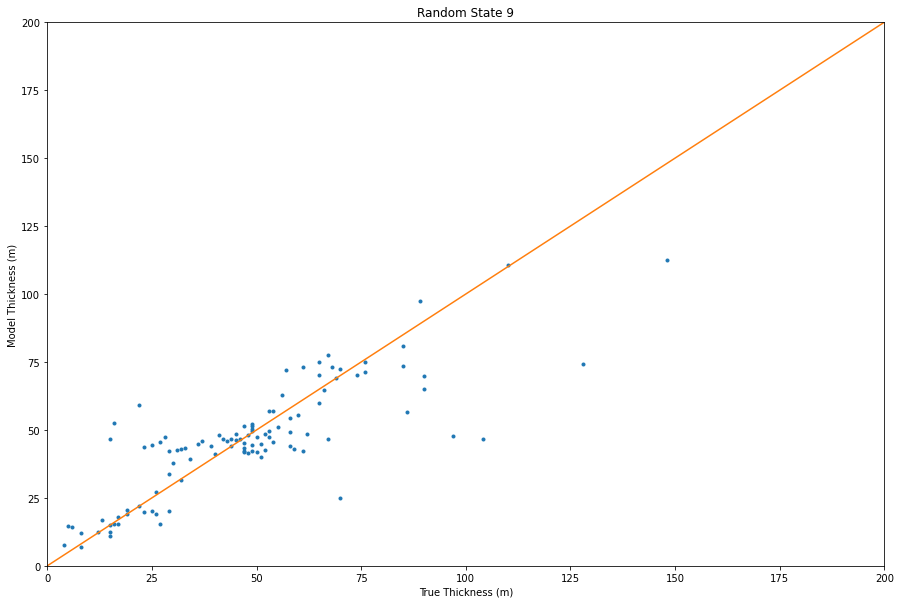

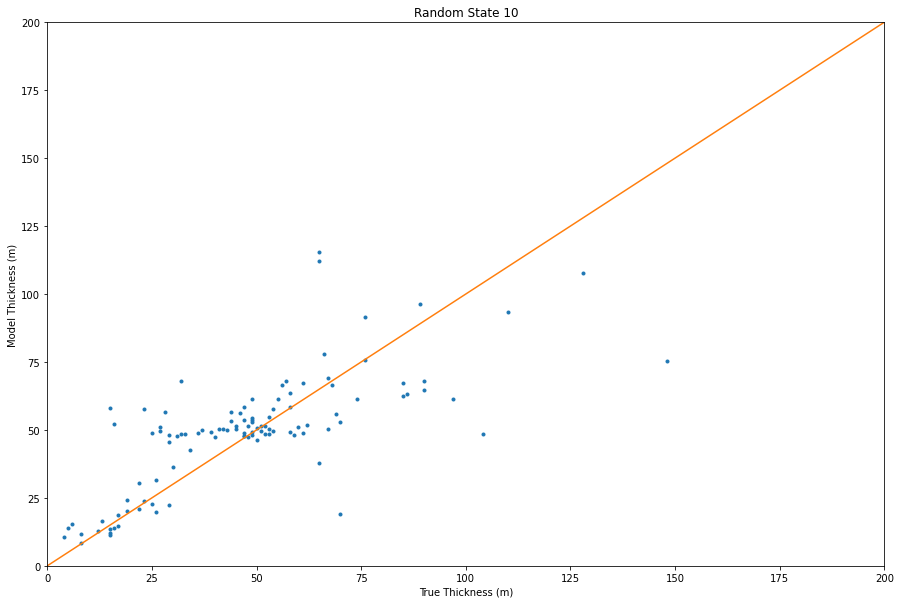

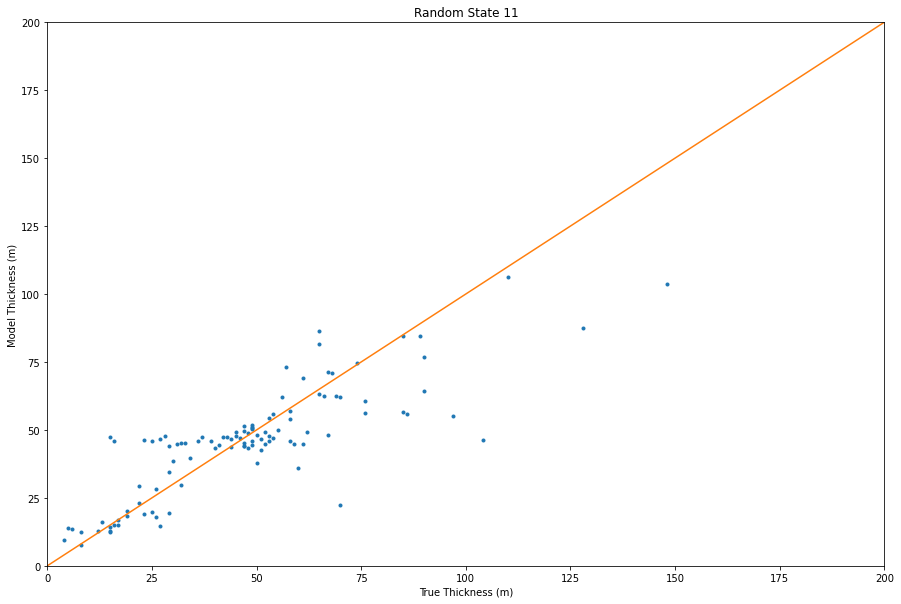

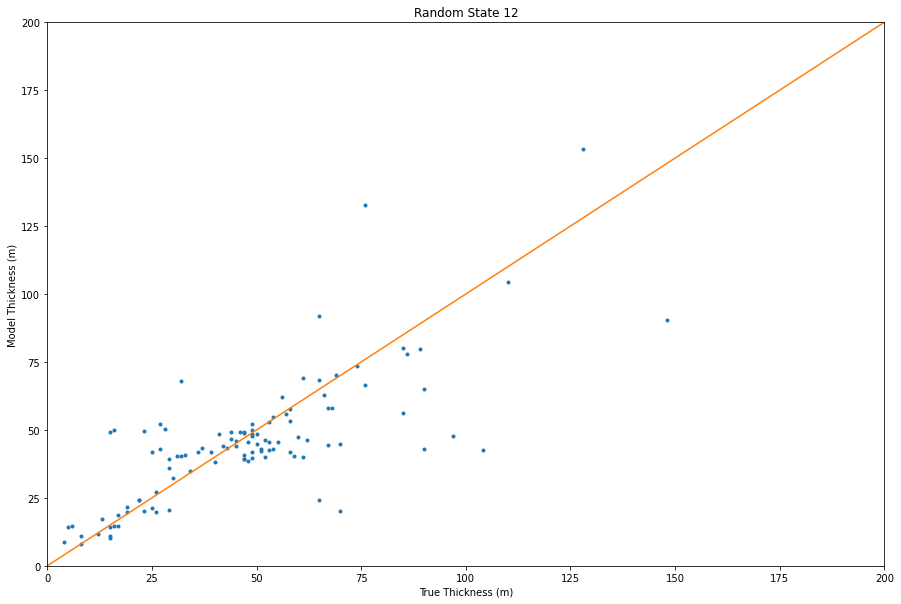

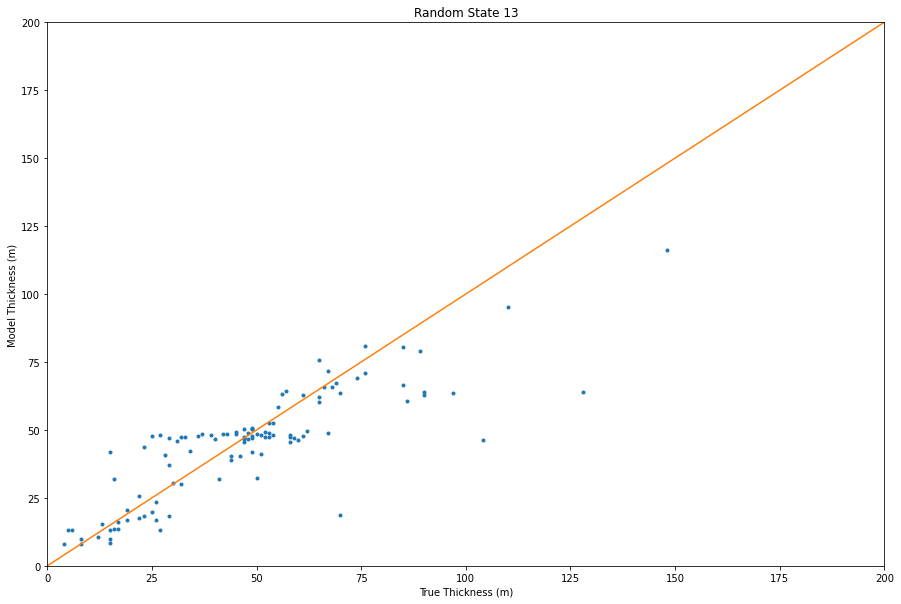

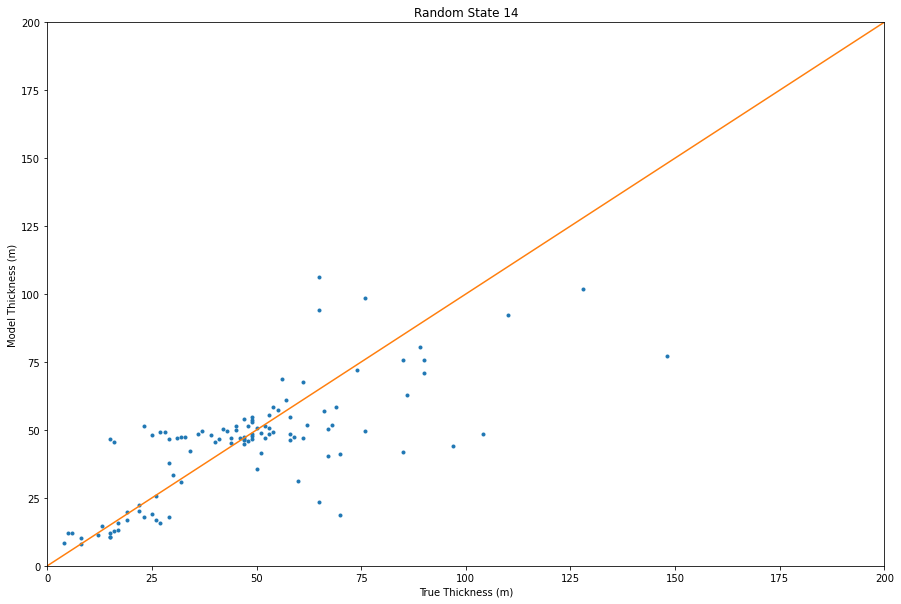

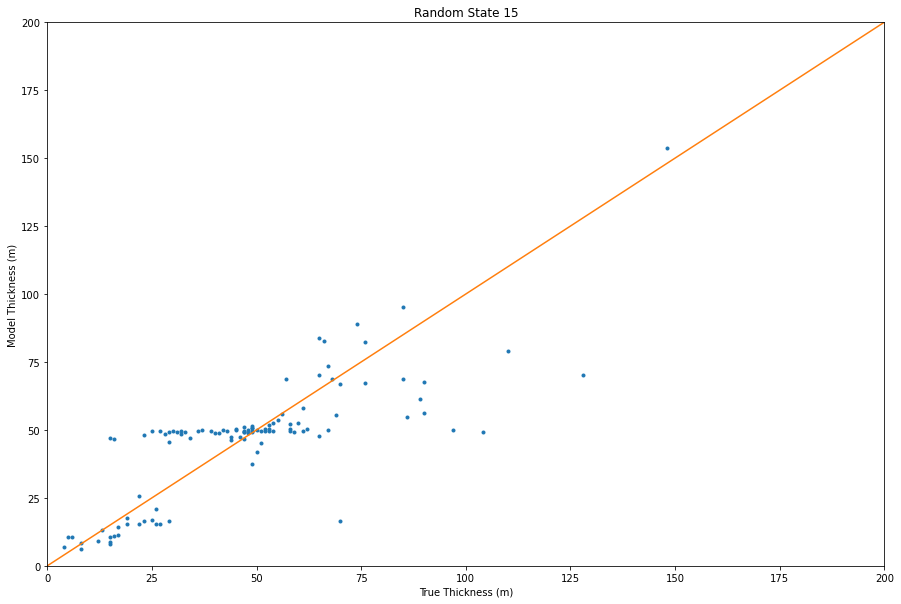

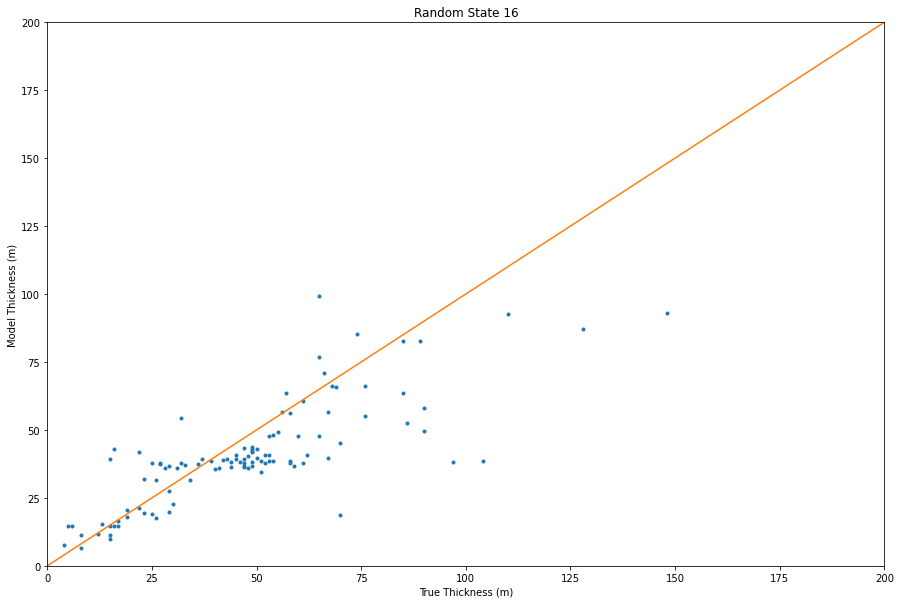

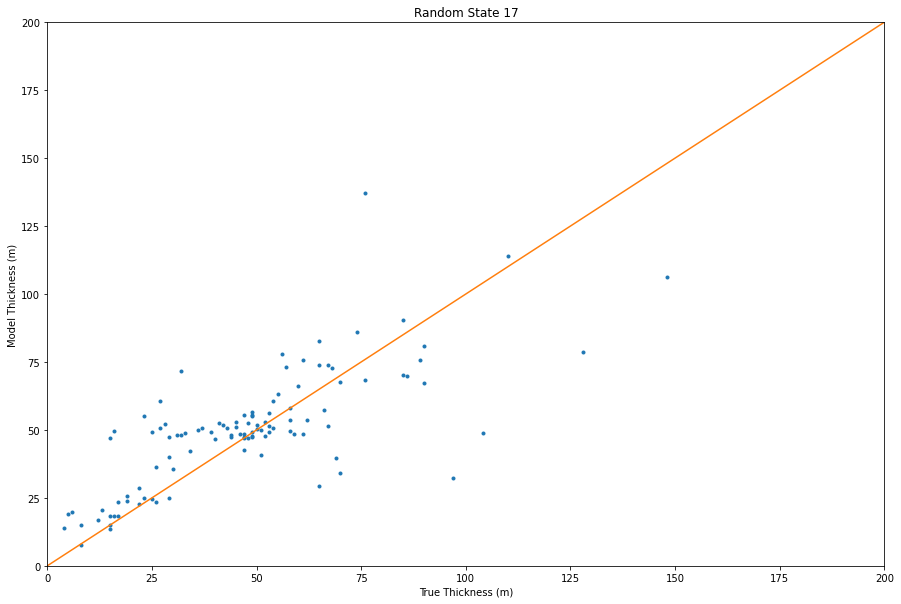

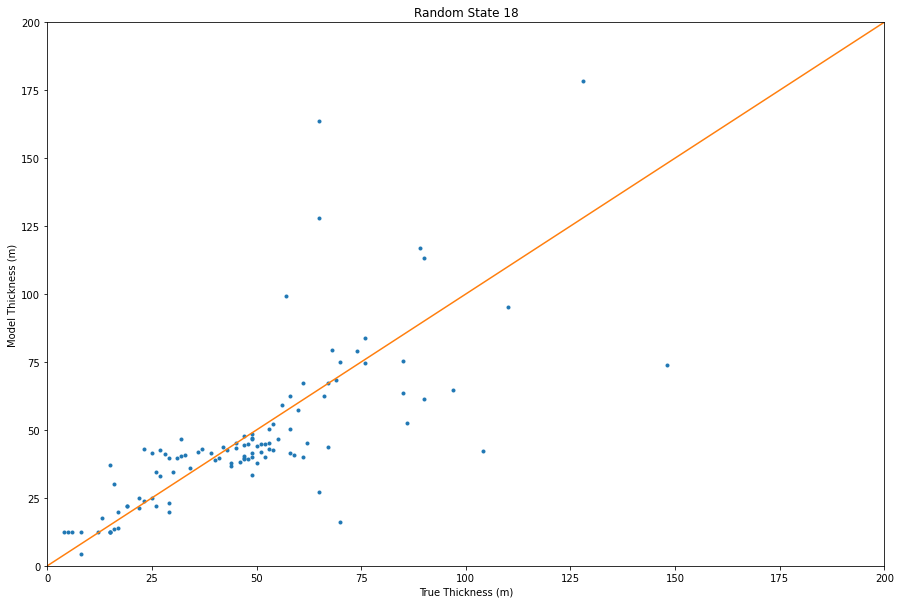

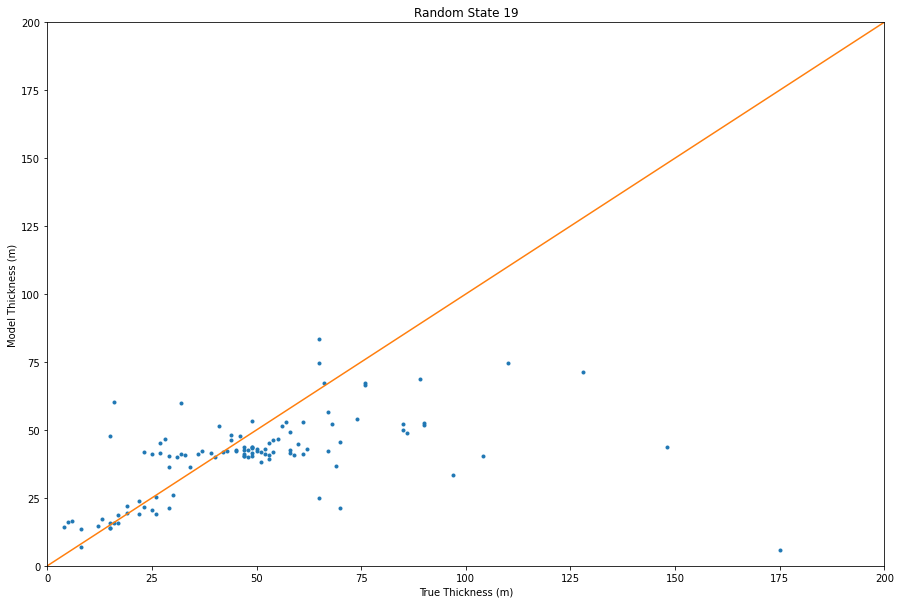

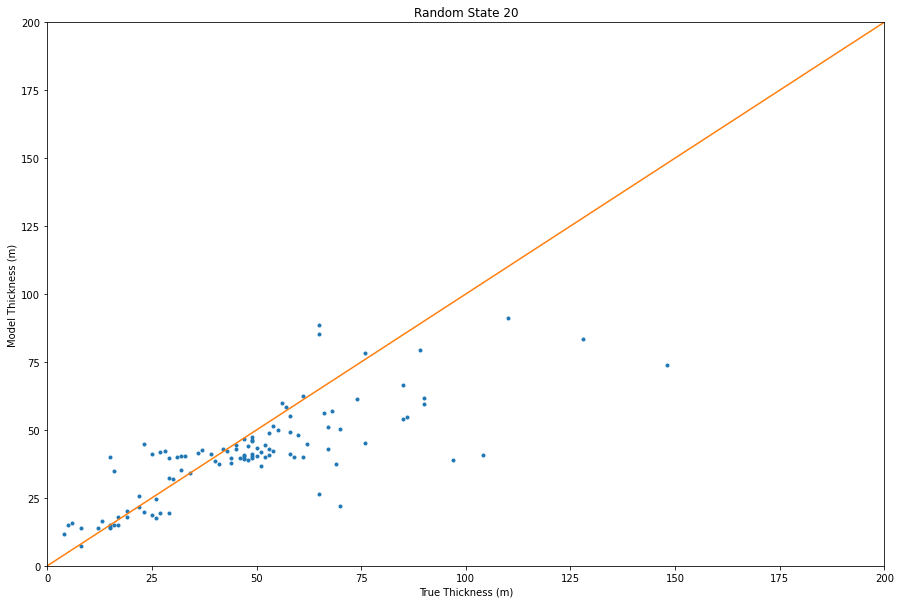

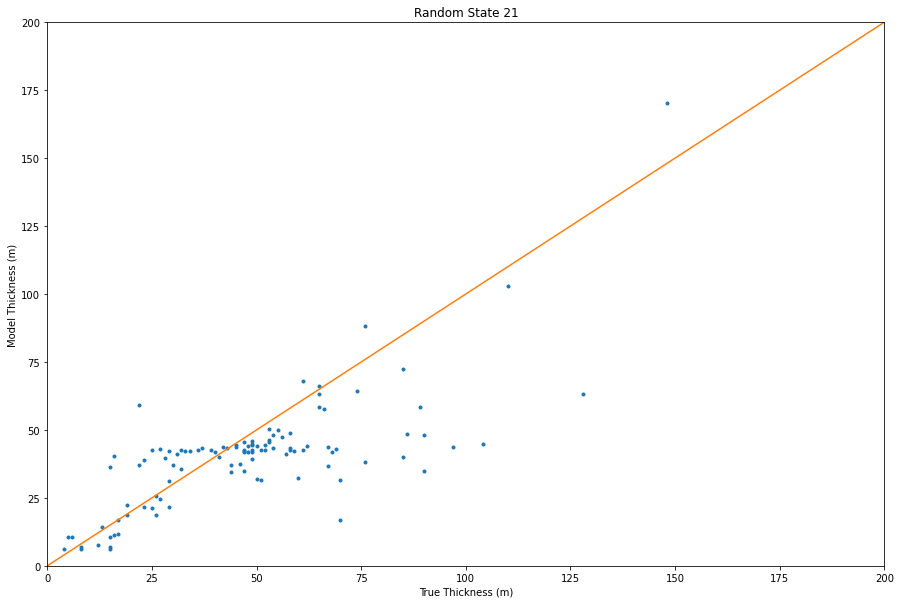

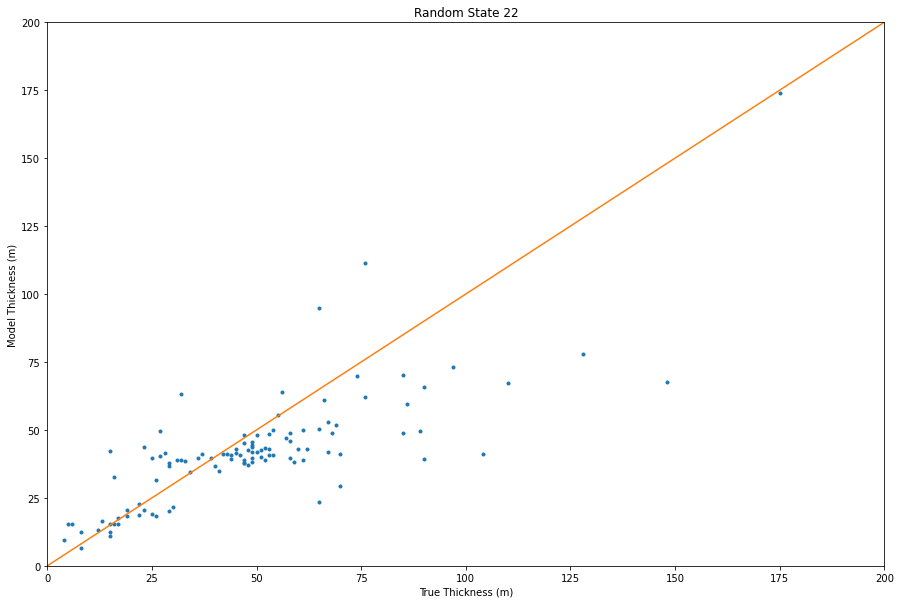

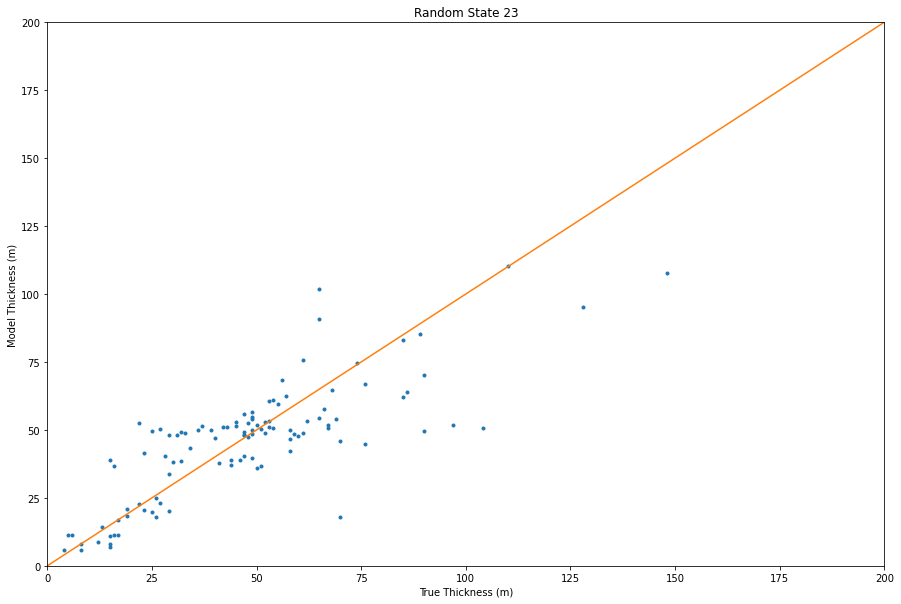

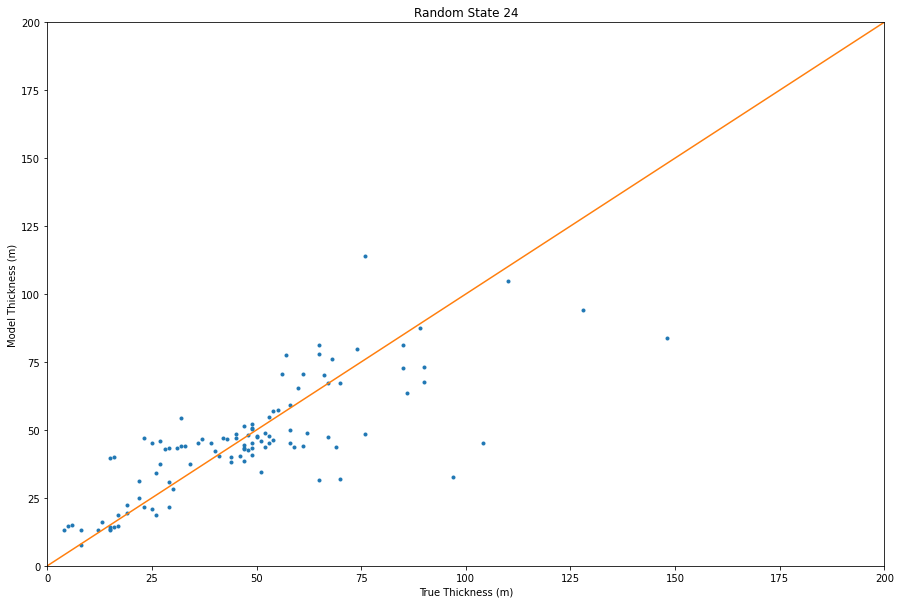

In [7]:
# select dataset to analyze

selected_dataset = 'df1'

if selected_dataset == 'df1':
    df = deviations_df1
    module = 'sm1'
    res = 'sr1'
    dataset = df1
    dataset.name = selected_dataset

if selected_dataset == 'df2':
    df = deviations_df2
    module = 'sm2'
    res = 'sr2'
    dataset = df2
    dataset.name = selected_dataset
    
if selected_dataset == 'df3':
    df = deviations_df3
    module = 'sm3'
    res = 'sr3'
    dataset = df3
    dataset.name = selected_dataset

if selected_dataset == 'df4':
    df = deviations_df4
    module = 'sm4'
    res = 'sr4'
    dataset = df4
    dataset.name = selected_dataset
    

"""
Here we load top rated model and look at predicted accuracies of each random state
"""

arch = df['layer architecture'].loc[0]
top_learning_rate = df['learning rate'].loc[0]
epochs = df['epochs'].loc[0]
dnn_model = {}
predictions = pd.DataFrame()
rootdir = 'saved_models/' + module + '/sm_' + arch + '/'
print('loading and evaluating models...')
for i in tqdm(os.listdir(rootdir)):
    if 'MULTI' in i and 'dnn' in i and str(top_learning_rate) in i:
        dnn_model[arch + '_' + i] = tf.keras.models.load_model(rootdir + i)

train_features, test_features, train_labels, test_labels = gl.data_splitter(dataset)
features = [train_features, test_features]
features = pd.concat(features)
labels = [train_labels, test_labels]
labels = pd.concat(labels)
for rs in RS:
    hhh = (
        str(arch) + 
        '_' + 
        dataset.name +
        '_dnn_MULTI_' + 
        str(top_learning_rate) + 
        '_0.2_' +
        str(epochs) + 
        '_' + 
        str(rs)
    )
    y = dnn_model[hhh].predict(features, verbose = 0)
    fig,ax=plt.subplots(1,1,figsize=(15,10))
    fig.patch.set_facecolor('w')
    plt.plot(labels,y,'.')
    plt.plot((0,200),(0,200),'-')
    plt.xlabel('True Thickness (m)')
    plt.ylabel('Model Thickness (m)')
    ax.set_title('Random State ' +str(rs))
    plt.xlim((0,200))
    plt.ylim((0,200))

/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


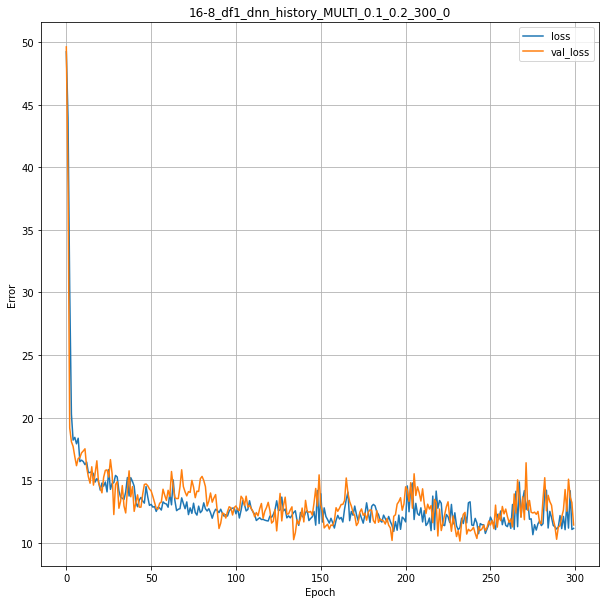

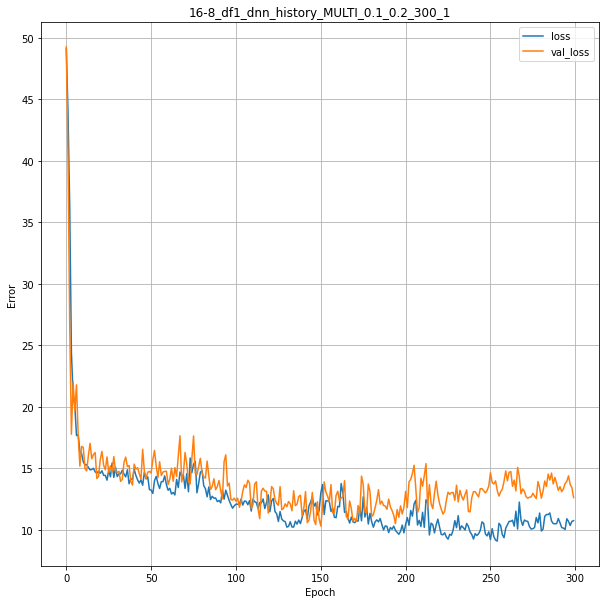

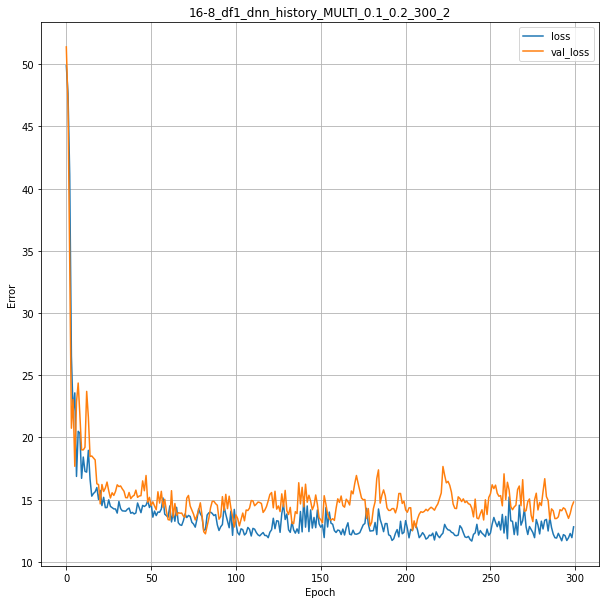

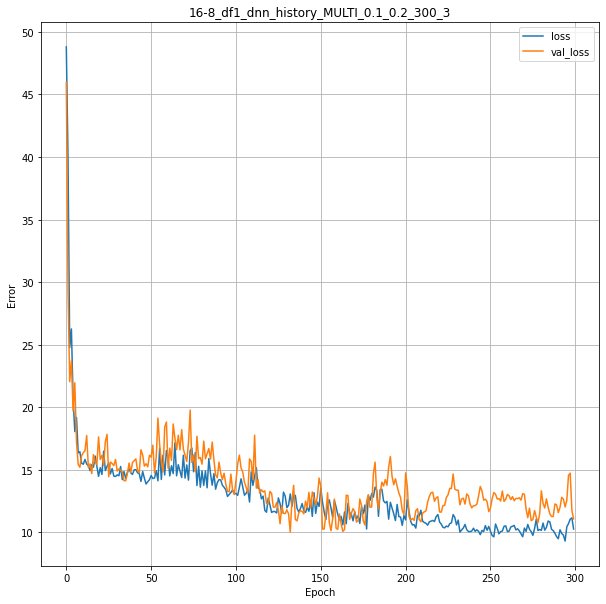

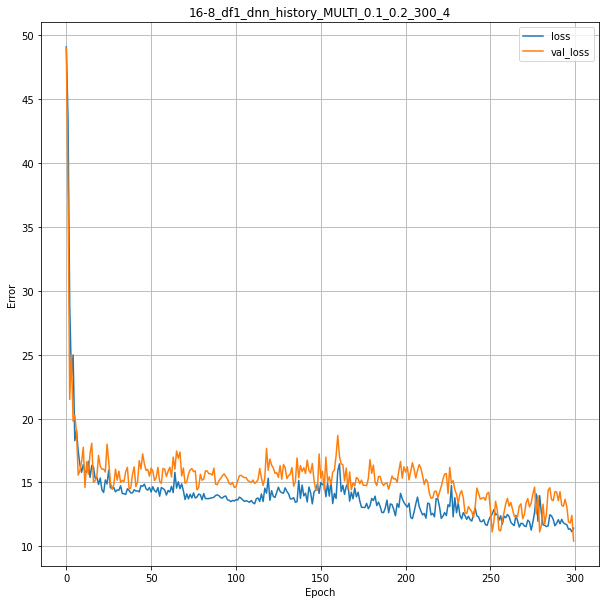

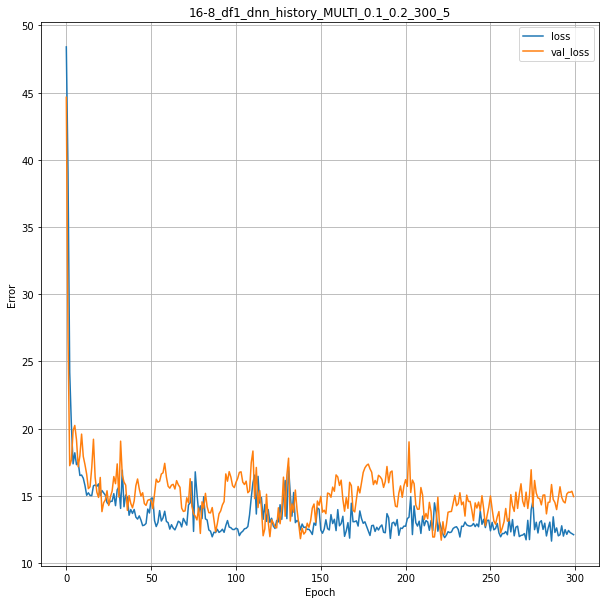

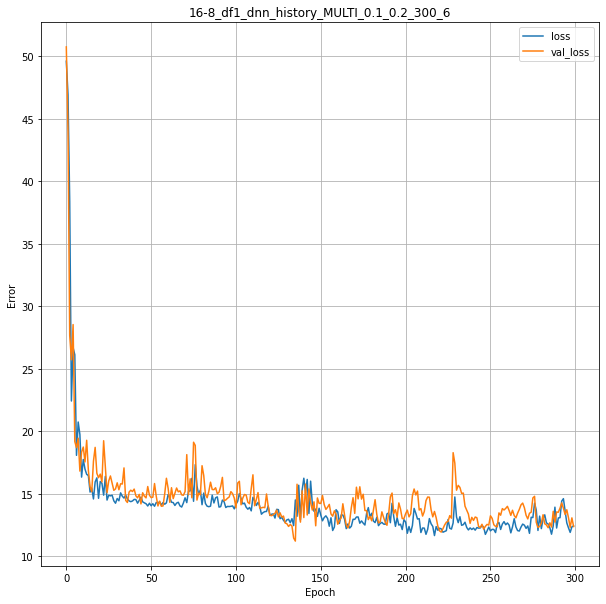

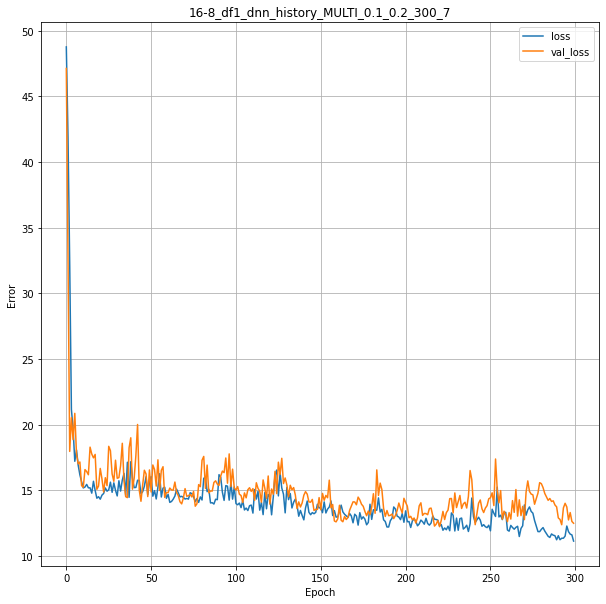

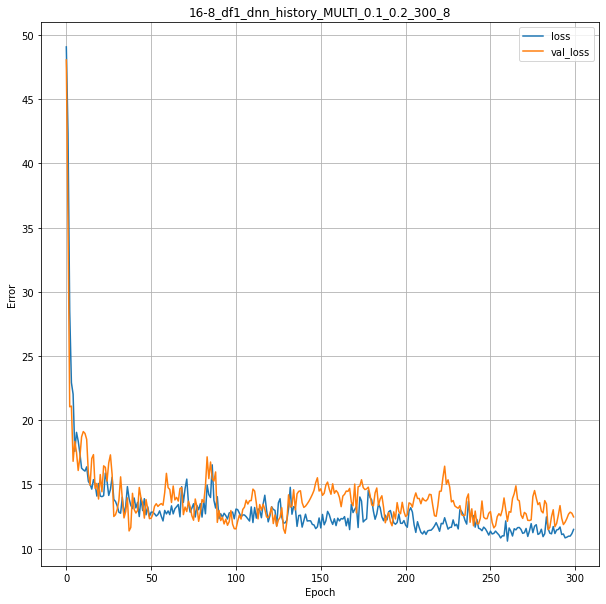

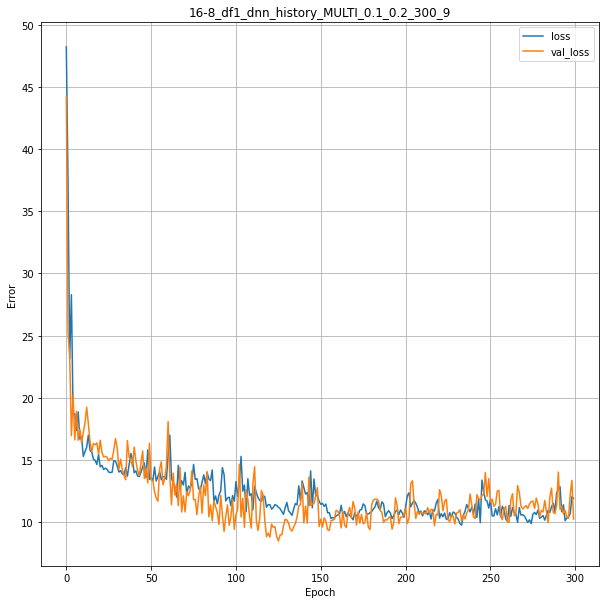

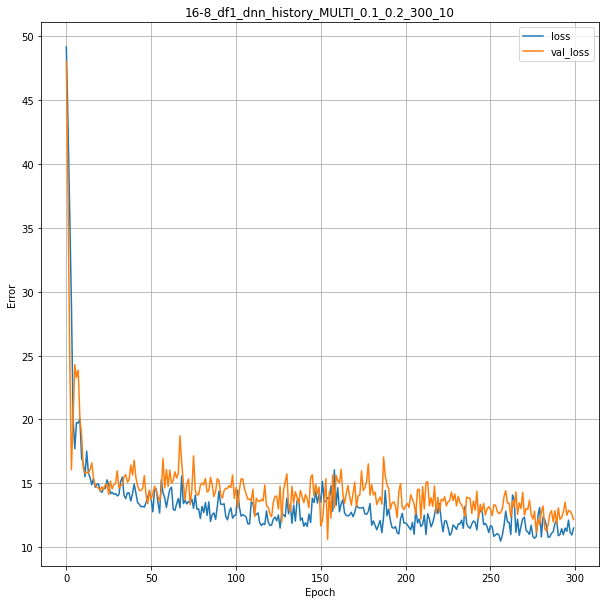

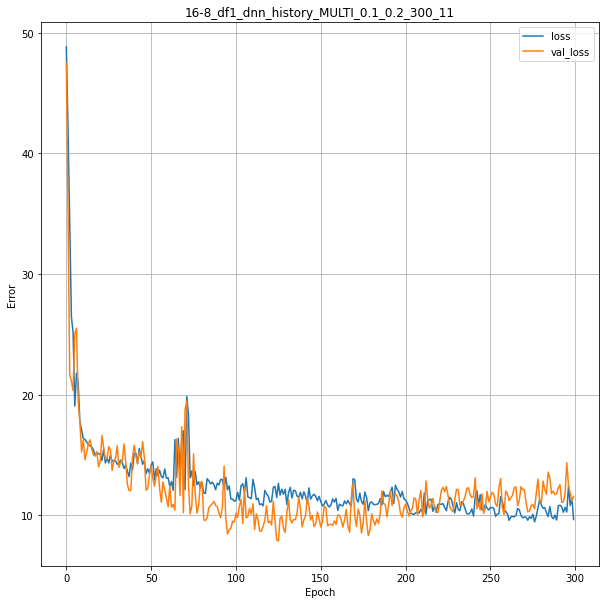

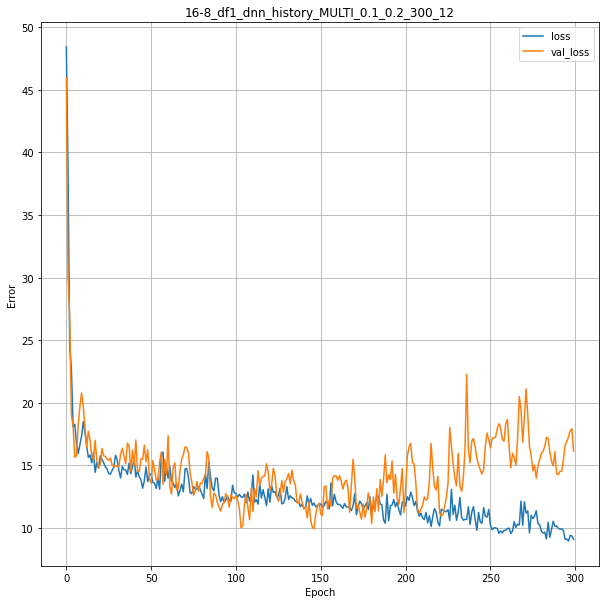

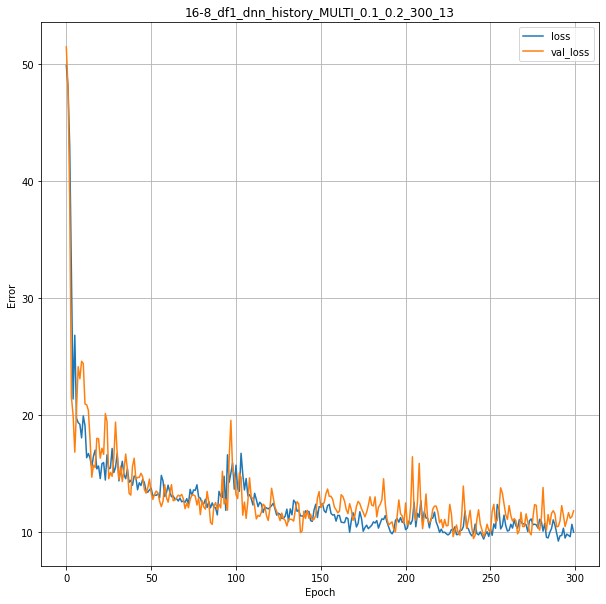

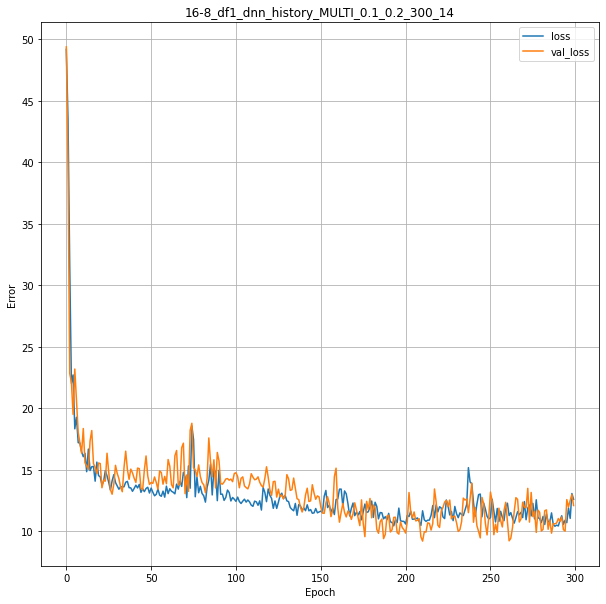

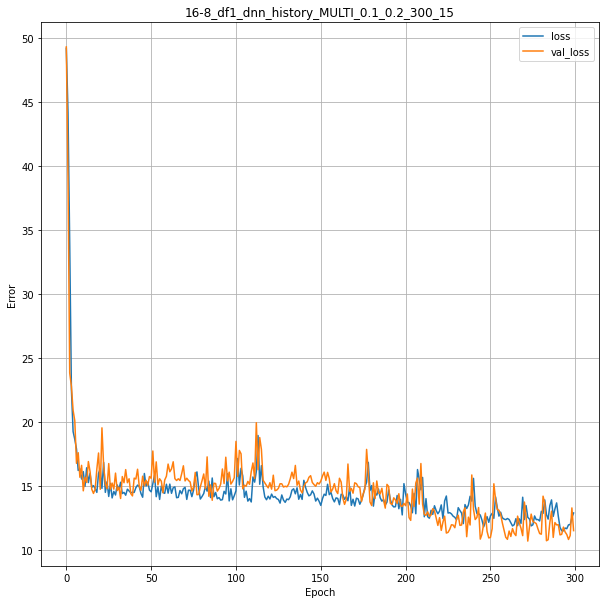

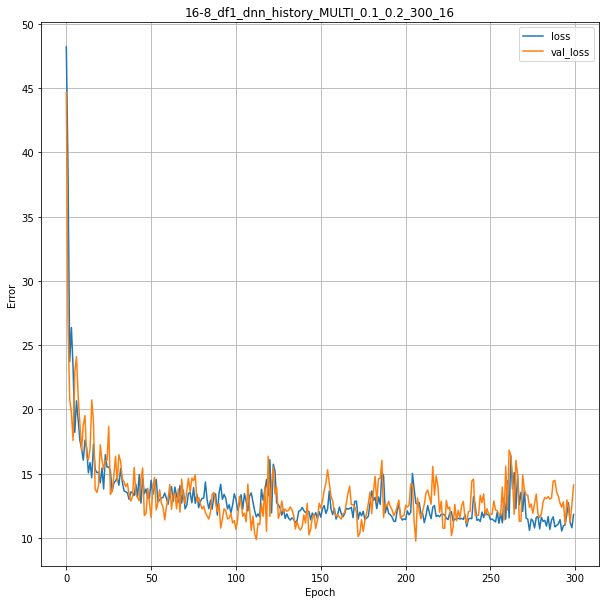

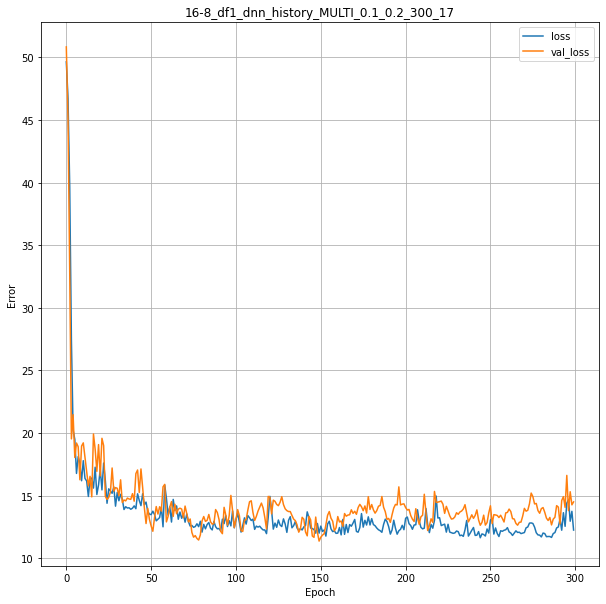

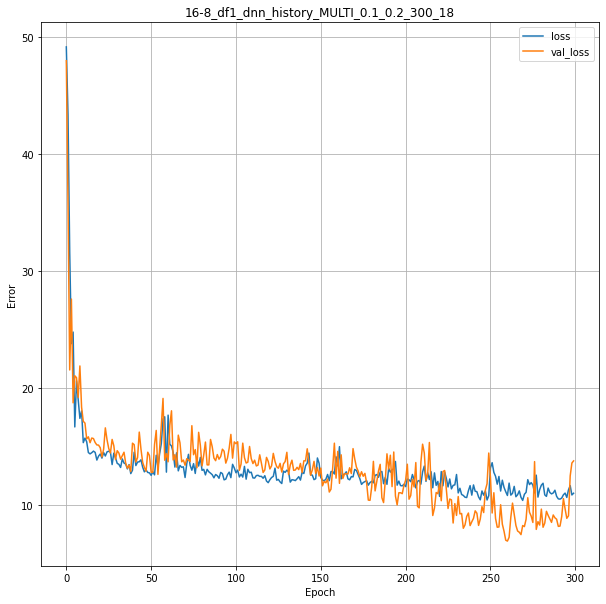

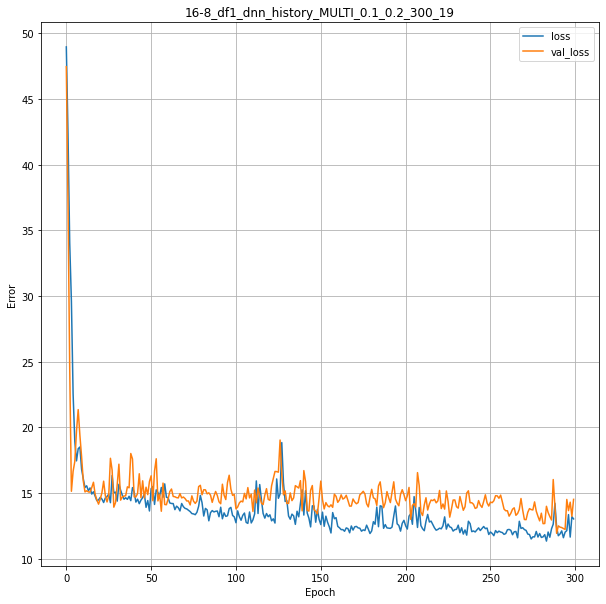

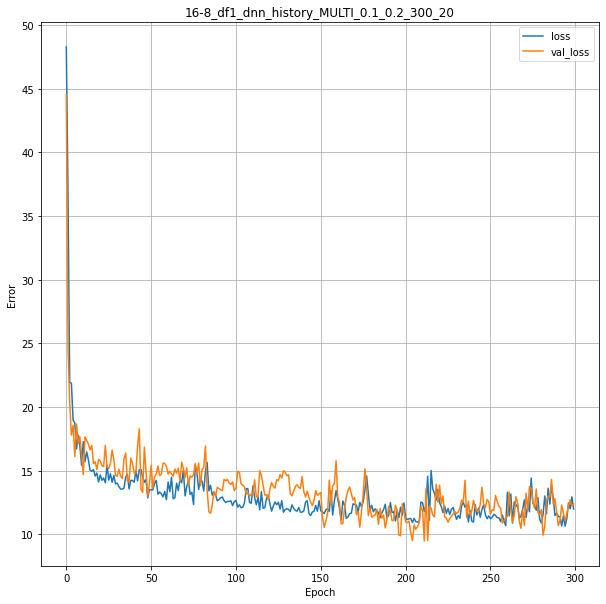

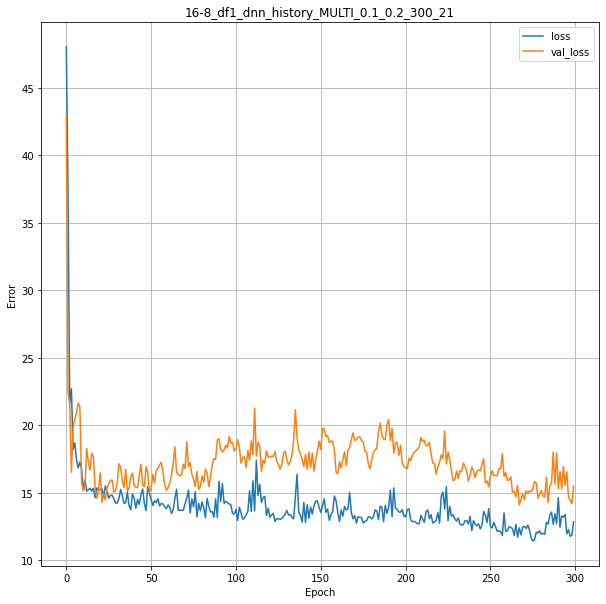

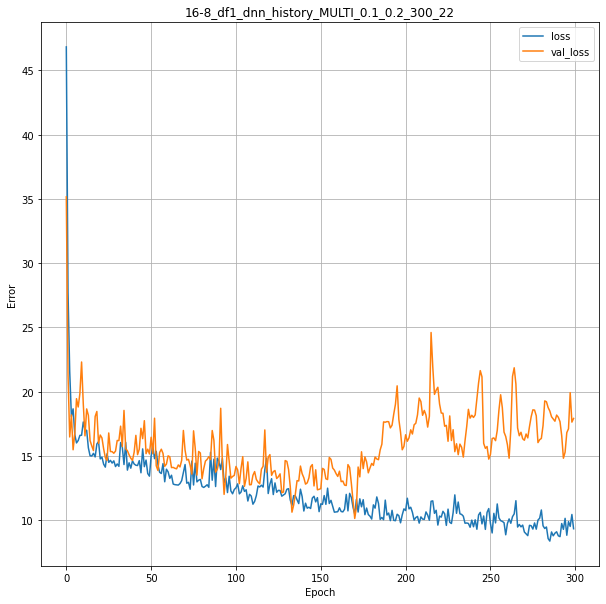

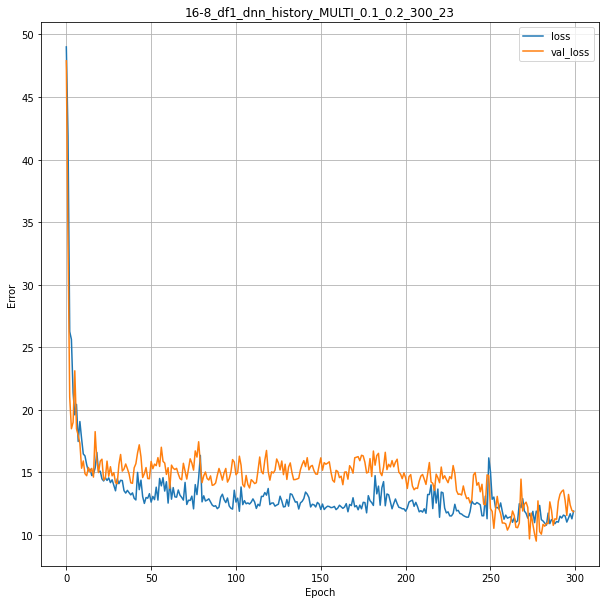

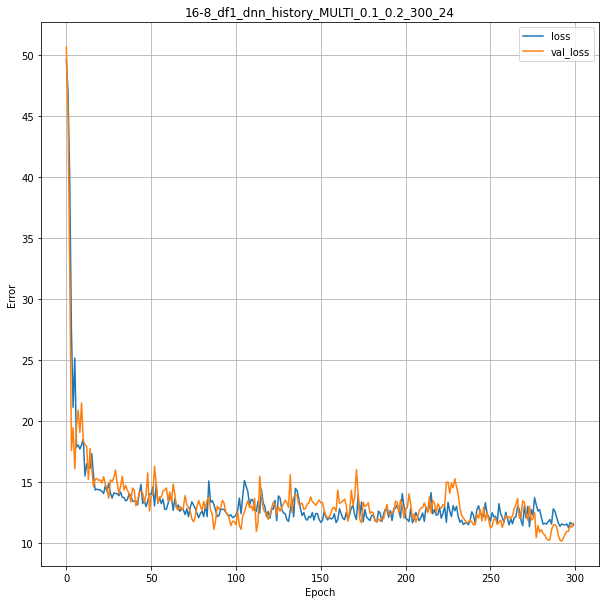

In [8]:
rootdir = 'saved_results/' + res + '/sr_' + arch + '/'
dnn_history = {}
for rs in RS: 
    history_name = (
        arch + 
        '_' +
        dataset.name +
        '_dnn_history_MULTI_' +
        str(top_learning_rate) +
        '_0.2_' +
        str(epochs) + 
        '_' + 
        str(rs)
    )
    model_name = (
        dataset.name +
        '_dnn_history_MULTI_' +
        str(top_learning_rate) +
        '_0.2_' +
        str(epochs) + 
        '_' + 
        str(rs)
    )
    dnn_history[history_name] = pd.read_csv(rootdir + model_name)

for hist in dnn_history:    
    fig,ax=plt.subplots(1,1,figsize=(10,10))
    fig.patch.set_facecolor('w')
    ax.set_title(hist)
    gl.plot_loss(dnn_history[hist])

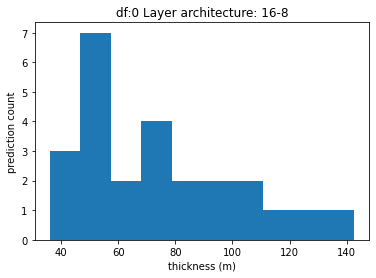

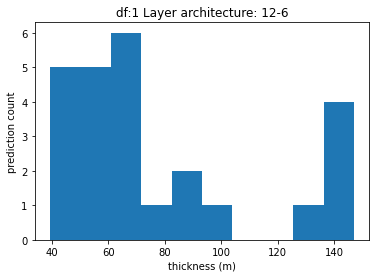

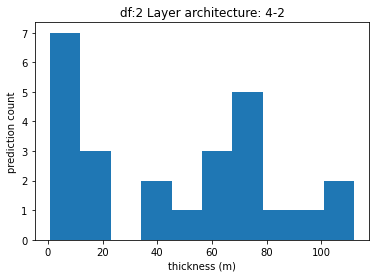

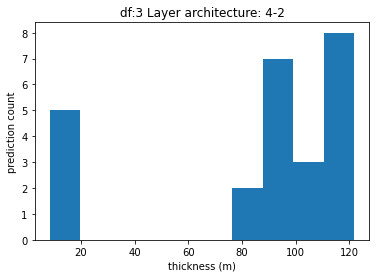

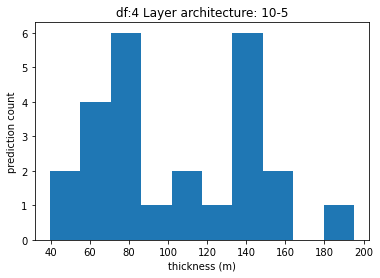

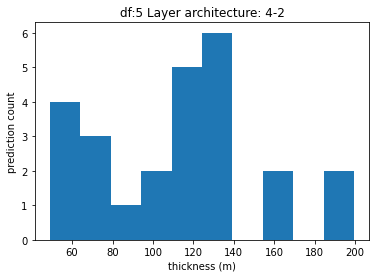

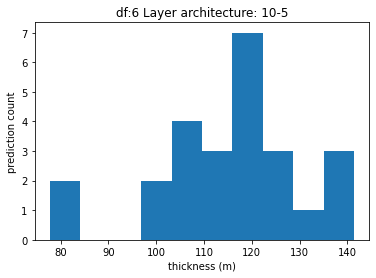

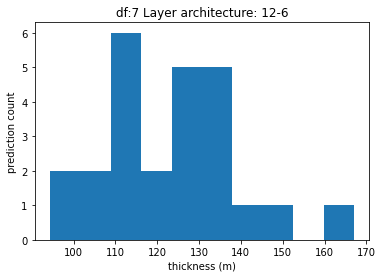

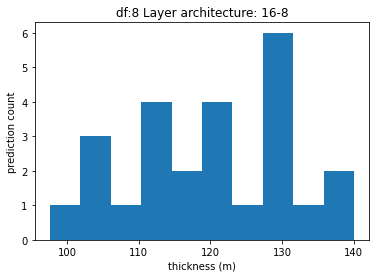

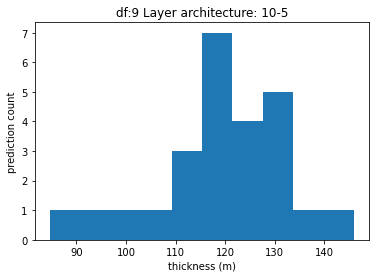

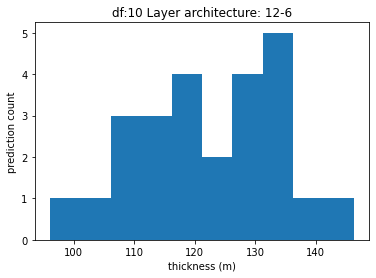

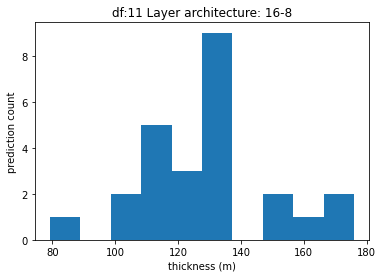

In [9]:
"""
This cell contains code to produce histograms of all the architectures different histories
"""

for i in deviations_df1.index:
#     print(i)
    df = deviations_df1.iloc[i]
    arch = df['layer architecture']
    top_learn_rate = df['learning rate']
    epochs = df['epochs']

    dfs = predictions_df1[
        (predictions_df1['architecture'] == arch) &
        (predictions_df1['learning rate'] == top_learn_rate) &
        (predictions_df1['epochs'] == epochs)
    ]
    fig,ax = plt.subplots()
    ax.set_title('df:' + str(i) + ' Layer architecture: ' + arch )
    ax.set_ylabel('prediction count')
    ax.set_xlabel('thickness (m)')
    fig.patch.set_facecolor('w')
    plt.hist(dfs['avg test thickness'])


In [10]:
ccccombo_breaker()
# past this point is under construction. 
# here be monsters

NameError: name 'ccccombo_breaker' is not defined

In [31]:
RGI_predicted_df1

,lat,lon,mean_slope,area,avg predicted thickness,predicted thickness std dev
0,63.6890,-146.8230,42.0,0.360,86.562510,25.744532
1,63.4040,-146.6680,16.0,0.558,72.150604,10.736878
2,63.3760,-146.0800,18.0,1.685,70.381720,11.674012
3,63.3810,-146.1200,19.0,3.681,66.314060,13.648347
4,63.5510,-147.0570,16.0,2.573,68.137350,11.425793
...,...,...,...,...,...,...
216496,-53.9860,-37.7325,29.9,0.042,67.664020,54.519270
216497,-54.8310,-36.1361,23.6,0.567,61.139473,49.831497
216498,-54.1884,-37.3018,16.8,4.118,54.490322,41.824330
216499,-68.8656,-90.4266,0.4,0.011,48.881360,38.552820


In [18]:
pth_3 = '/data/fast1/glacierml/T_models/matched_indexes/'
df1 = pd.read_csv(pth_3 + 'GlaThiDa_RGI_matched_indexes_1_live.csv')
df2 = pd.read_csv(pth_3 + 'GlaThiDa_RGI_matched_indexes_2_live.csv')
df3 = pd.read_csv(pth_3 + 'GlaThiDa_RGI_matched_indexes_3_live.csv')

In [ ]:
RGI_predicted['volume'] = (RGI_predicted['avg predicted thickness'] / 10**3) * RGI_predicted['area']
RGI_predicted['variance'] = RGI_predicted['predicted thickness std dev'] **2 
total_volume = sum(RGI_predicted['volume'])
variance = sum(RGI_predicted['variance'])
print(total_volume/1e3)
print(np.sqrt(variance)/1e3)

loading RGI...


100%|██████████| 19/19 [00:00<00:00, 28.84it/s]


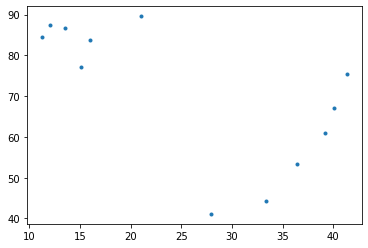

In [32]:
print('loading RGI...')
rootdir = '/data/fast0/datasets/rgi60-attribs/'
RGI_extra = pd.DataFrame()
for file in tqdm(os.listdir(rootdir)):
    f = pd.read_csv(rootdir+file, encoding_errors = 'replace', on_bad_lines = 'skip')
    RGI_extra = RGI_extra.append(f, ignore_index = True)
    

RGI = RGI_extra[[
    'RGIId',
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Area',
    'Aspect',
    'Lmax'
]]

df1 = RGI_predicted_df1
(sum((df1['area'] * df1['avg predicted thickness']) * 10**6) / 10**9)


AIC = deviations_df1['model parameters'] - deviations_df1['test mae avg']

AIC.sort_values()

fig,ax = plt.subplots()
fig.patch.set_facecolor('w')
plt.plot(
    deviations_df1['test predicted thickness std dev'], 
    deviations_df1['test mae avg'],
    '.',
)

In [33]:
"""
This is a density plot of the most recent predictions made. Can easily be modified in a loop
to show multiple random states and whatnot
"""
sns.set(rc={"figure.figsize":(15,10)})
sns.kdeplot(x = test_labels, y = y.flatten(),fill = True)
plt.plot((0,300),(0,300),'-')

ValueError: array length 110 does not match index length 22

In [ ]:
"""
This cell computes the true average thickness of the glaciers in use
"""


pth = '/data/fast1/glacierml/T_models/'
T_lab = pd.read_csv(pth + 'T.csv', low_memory = False)
T_lab = T_lab[[
    'GlaThiDa_ID',
    'LAT',
    'LON',
    'AREA',
    'MEAN_SLOPE',
    'MEAN_THICKNESS'
]]
T_lab = T_lab.dropna()

tru_thickness = np.sum(T_lab['MEAN_THICKNESS']) / len(T_lab['MEAN_THICKNESS'])
tru_thickness